Overall Churn Rate: 20.37%

Churn Rate by Tenure Category:
TenureCategory
0-1    22.415459
1-3    20.126398
3-5    20.589705
5+     19.670672
Name: Exited, dtype: float64


C:\Users\DEVDUTT\AppData\Local\Temp\ipykernel_20436\675124868.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('TenureCategory')['Exited'].mean() * 100  # Churn rate in each tenure category


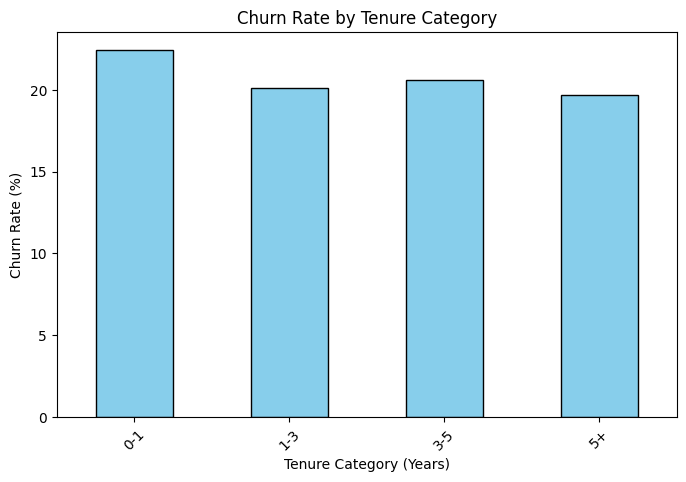

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Specify the paths for the Excel and CSV files
excel_file = Path("../data/CSV_Matrix_2.0_Group_A.xlsx")
file_path = Path("../data/Bank_Churn_Data.csv")

df = pd.read_csv(file_path)

# Step 1: Calculate the Overall Churn Rate
total_customers = df.shape[0]  # Total number of customers
churned_customers = df['Exited'].sum()  # Total number of churned customers
churn_rate = (churned_customers / total_customers) * 100

print(f"Overall Churn Rate: {churn_rate:.2f}%")

# Step 2: Categorize Tenure and Calculate Churn Rate by Tenure Category
# Define tenure categories: 0-1 years, 1-3 years, 3-5 years, 5+ years
df['TenureCategory'] = pd.cut(df['Tenure'], bins=[0, 1, 3, 5, 10], labels=['0-1', '1-3', '3-5', '5+'])

# Calculate churn rate by TenureCategory
tenure_churn = df.groupby('TenureCategory')['Exited'].mean() * 100  # Churn rate in each tenure category
print("\nChurn Rate by Tenure Category:")
print(tenure_churn)

# Step 3: Visualize Churn Rate by Tenure Category
plt.figure(figsize=(8, 5))
tenure_churn.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Churn Rate by Tenure Category')
plt.xlabel('Tenure Category (Years)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()


Number of potential customers in France: 2589


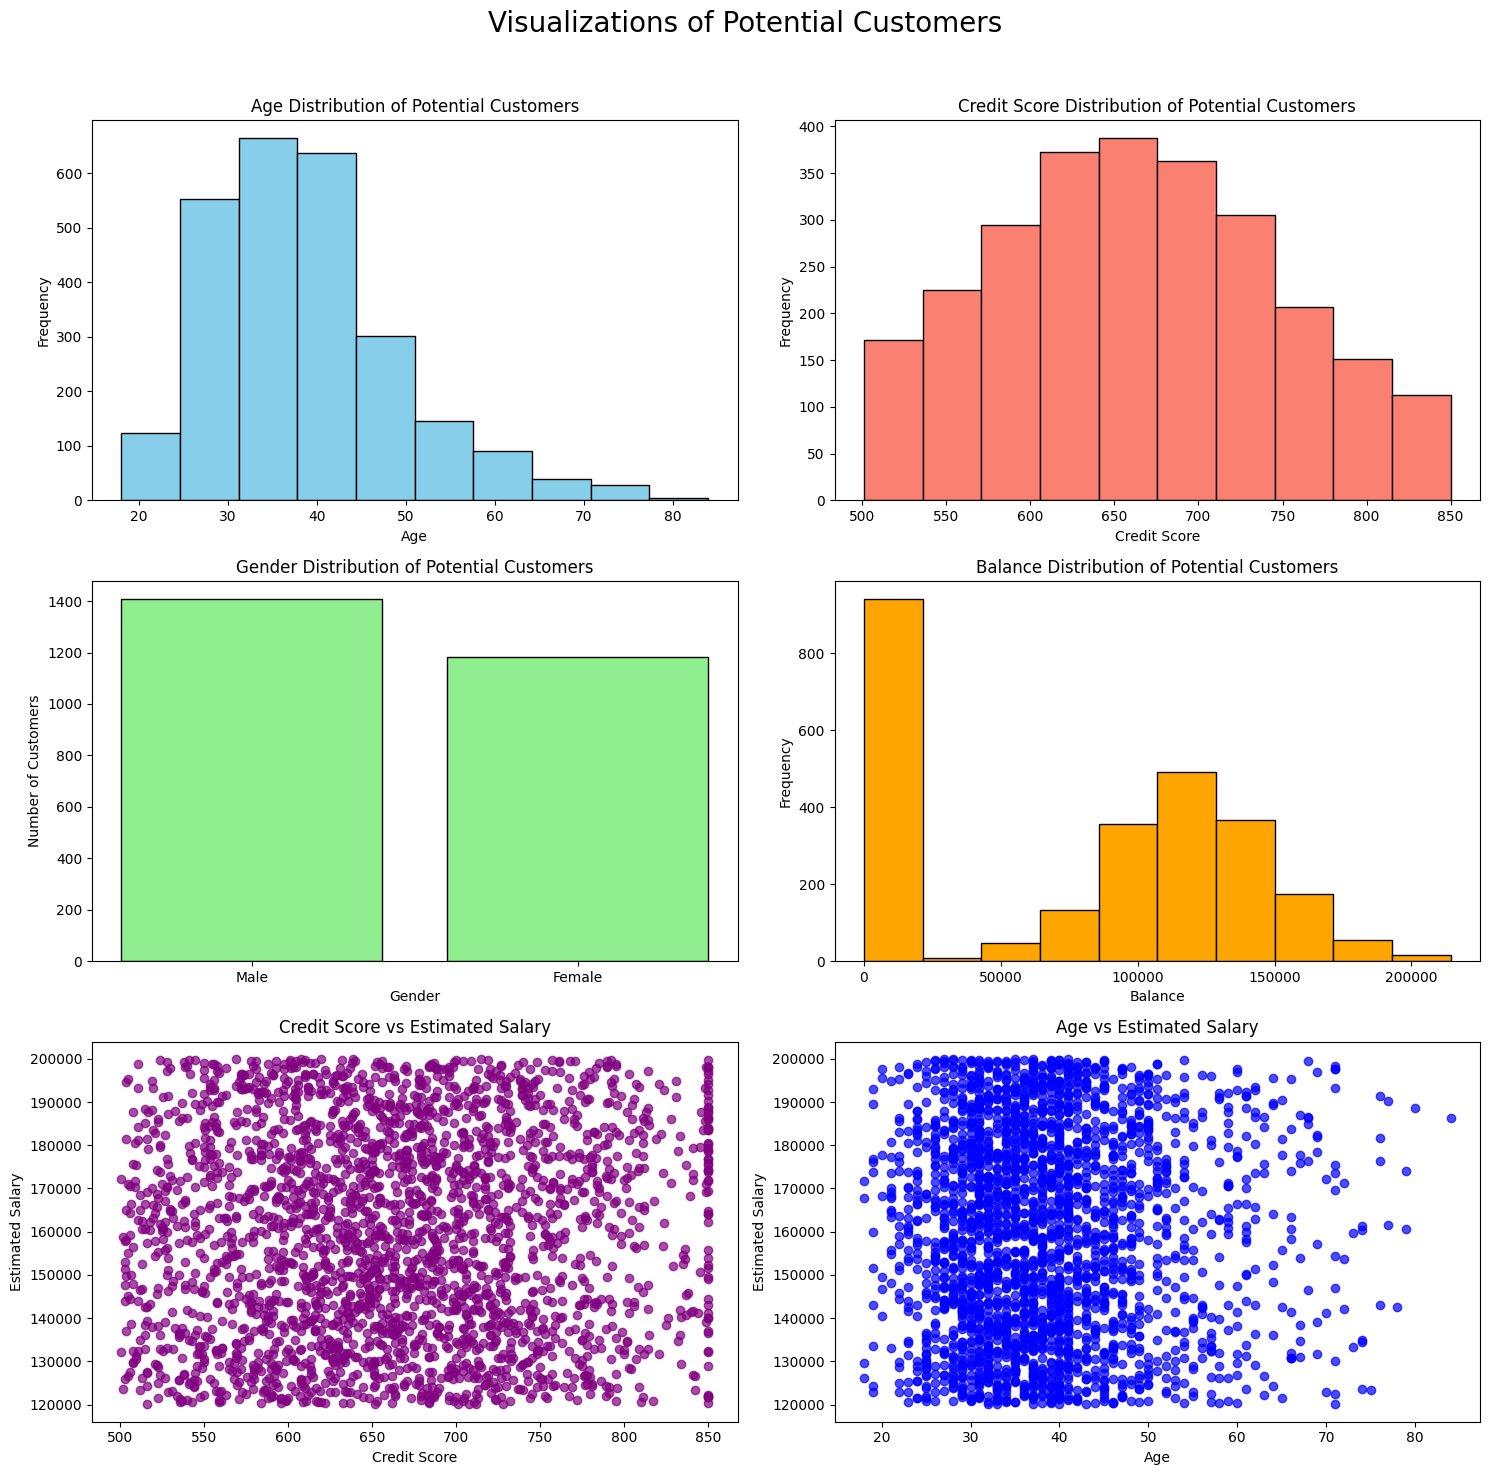

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data
file_path = Path("../data/Bank_Churn_Data.csv")
df = pd.read_csv(file_path)

# Filtering the dataset for potential customers
potential_customers = df[(df['CreditScore'] > 500) & 
                          (df['EstimatedSalary'] > 120000) & 
                          (df['HasCrCard'] == 1)]

# Number of potential customers
num_potential_customers = potential_customers.shape[0]
print(f"Number of potential customers in France: {num_potential_customers}")

# Set up the figure for multiple plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Visualizations of Potential Customers', fontsize=20)

# Histogram for Age
axs[0, 0].hist(potential_customers['Age'], bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Age Distribution of Potential Customers')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Credit Score
axs[0, 1].hist(potential_customers['CreditScore'], bins=10, color='salmon', edgecolor='black')
axs[0, 1].set_title('Credit Score Distribution of Potential Customers')
axs[0, 1].set_xlabel('Credit Score')
axs[0, 1].set_ylabel('Frequency')

# Bar chart for Gender Distribution
gender_counts = potential_customers['Gender'].value_counts()
axs[1, 0].bar(gender_counts.index, gender_counts.values, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Gender Distribution of Potential Customers')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Number of Customers')

# Histogram for Balance
axs[1, 1].hist(potential_customers['Balance'], bins=10, color='orange', edgecolor='black')
axs[1, 1].set_title('Balance Distribution of Potential Customers')
axs[1, 1].set_xlabel('Balance')
axs[1, 1].set_ylabel('Frequency')

# Scatter plot for Credit Score vs Estimated Salary
axs[2, 0].scatter(potential_customers['CreditScore'], potential_customers['EstimatedSalary'], alpha=0.7, color='purple')
axs[2, 0].set_title('Credit Score vs Estimated Salary')
axs[2, 0].set_xlabel('Credit Score')
axs[2, 0].set_ylabel('Estimated Salary')

# Scatter plot for Age vs Estimated Salary
axs[2, 1].scatter(potential_customers['Age'], potential_customers['EstimatedSalary'], alpha=0.7, color='blue')
axs[2, 1].set_title('Age vs Estimated Salary')
axs[2, 1].set_xlabel('Age')
axs[2, 1].set_ylabel('Estimated Salary')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the title
plt.show()


In [4]:
print(potential_customers[['CustomerId', 'Surname', 'CreditScore', 'EstimatedSalary']])

      CustomerId      Surname  CreditScore  EstimatedSalary
5       15574012          Chu          645        149756.71
20      15577657     McDonald          732        170886.17
21      15597945     Dellucci          636        138555.46
24      15625047          Yen          846        187616.16
26      15736816        Young          756        170041.95
...          ...          ...          ...              ...
9973    15806455       Miller          611        157474.10
9975    15666295        Smith          610        196526.55
9978    15703563        P'eng          774        191608.97
9989    15605622     McMillan          841        179436.60
9992    15657105  Chukwualuka          726        195192.40

[2589 rows x 4 columns]


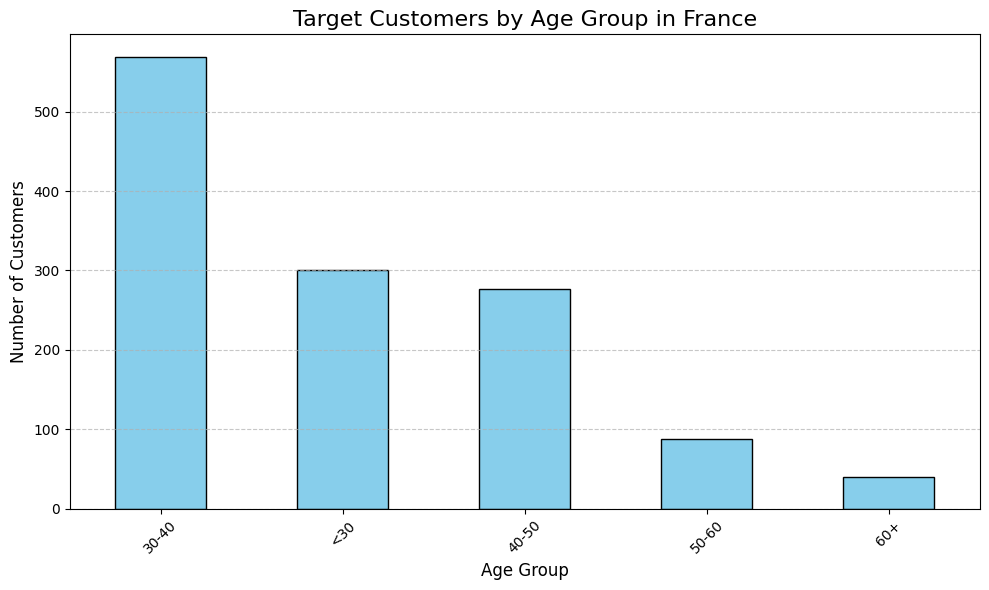

In [6]:
# Create age groups for better segmentation
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70], labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Filter for target customers in France
target_customers = df[
    (df['Geography'] == 'France') &
    (df['CreditScore'] > 500) &
    (df['EstimatedSalary'] > 120000) &
    (df['HasCrCard'] == 1)
]

# Count customers in each age group
age_group_counts = target_customers['AgeGroup'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Customers by Age Group in France', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


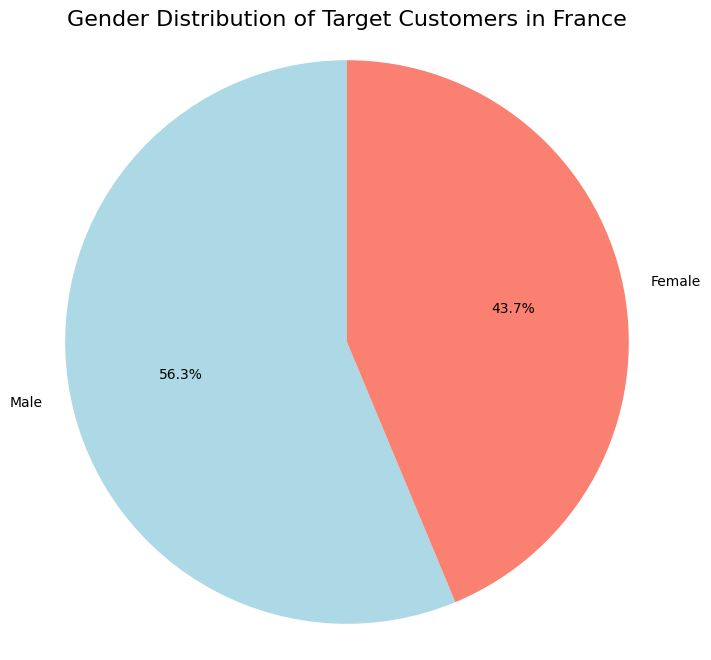

In [7]:
# Count gender distribution among target customers
gender_distribution = target_customers['Gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Gender Distribution of Target Customers in France', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


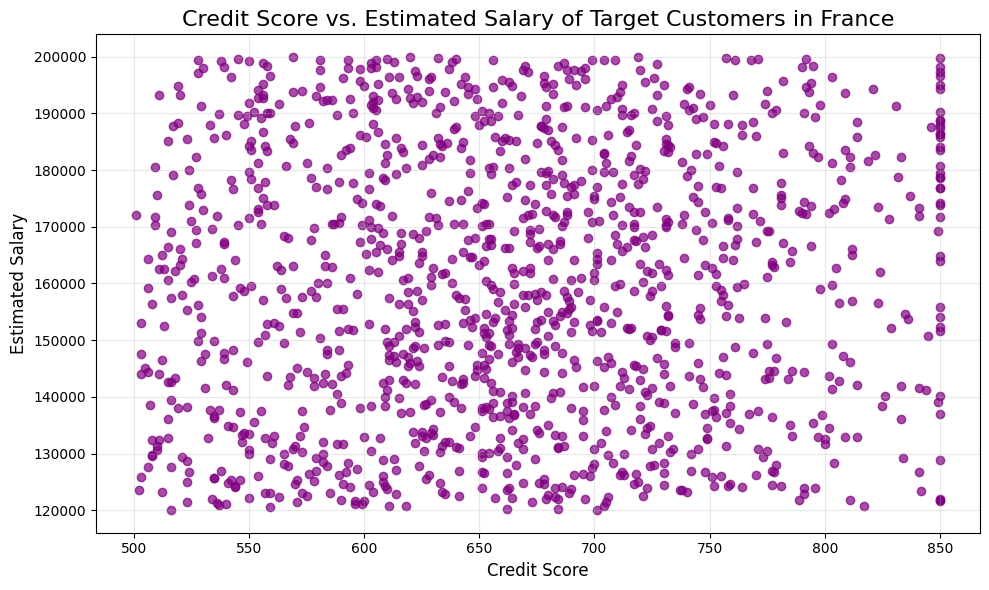

In [8]:
# Plotting the scatter plot for Credit Score vs. Estimated Salary
plt.figure(figsize=(10, 6))
plt.scatter(target_customers['CreditScore'], target_customers['EstimatedSalary'], alpha=0.7, color='purple')
plt.title('Credit Score vs. Estimated Salary of Target Customers in France', fontsize=16)
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Number of At-Risk Customers: 5


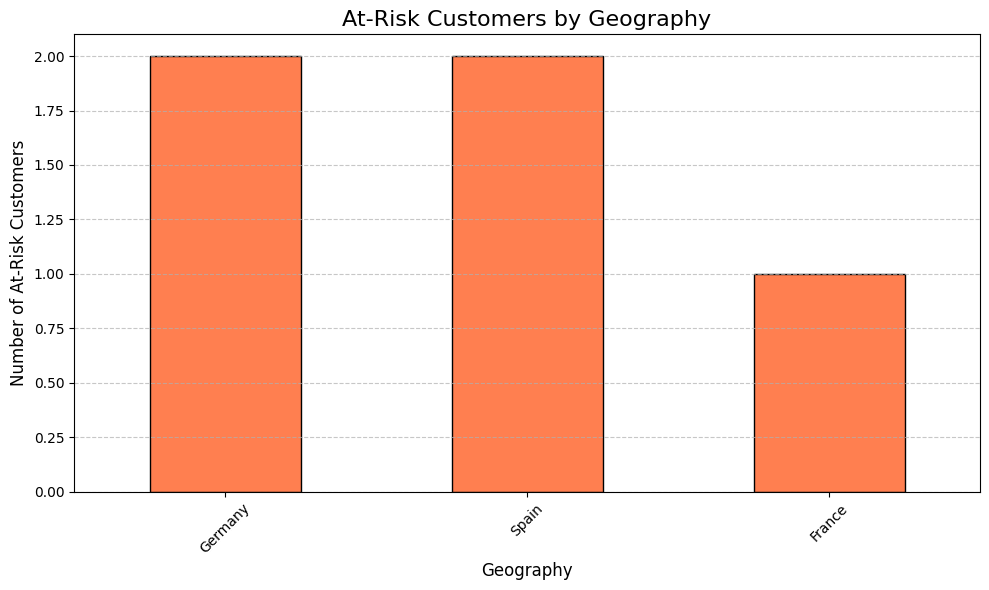

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = Path("../data/Bank_Churn_Data.csv")
df = pd.read_csv(file_path)

# Step 1: Identify At-Risk Customers
at_risk_customers = df[
    (df['CreditScore'] < 600) &
    (df['Age'] > 50) &
    (df['Balance'] > 100000) &
    (df['IsActiveMember'] == 0) &
    (df['NumOfProducts'] <= 1) &
    (df['Exited'] == 0)
]

# Count the number of at-risk customers
num_at_risk = at_risk_customers.shape[0]
print(f"Number of At-Risk Customers: {num_at_risk}")

# Step 2: Visualize At-Risk Customers by Geography
geography_counts = at_risk_customers['Geography'].value_counts()

# Plotting the bar chart for at-risk customers by geography
plt.figure(figsize=(10, 6))
geography_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('At-Risk Customers by Geography', fontsize=16)
plt.xlabel('Geography', fontsize=12)
plt.ylabel('Number of At-Risk Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from pathlib import Path

# Load the data
file_path = Path("../data/Bank_Churn_Data.csv")
df = pd.read_csv(file_path)

# Identify At-Risk Customers based on the given criteria
at_risk_customers = df[
    (df['CreditScore'] < 600) &
    (df['Age'] > 50) &
    (df['Balance'] > 100000) &
    (df['IsActiveMember'] == 0) &
    (df['NumOfProducts'] <= 1) &
    (df['Exited'] == 0)
]

# Display the At-Risk Customers
print("At-Risk Customers:")
print(at_risk_customers
      )

# Optionally, you can also save this data to a new CSV file for further analysis
# at_risk_customers.to_csv('at_risk_customers.csv', index=False)


At-Risk Customers:
      CustomerId        Surname  CreditScore Geography  Gender  Age  Tenure  \
3589    15785406          Watts          446    France  Female   51       4   
8156    15785576      Mayrhofer          434   Germany    Male   71       9   
8188    15623314         Tucker          506   Germany  Female   59       3   
8711    15673995             Tu          516     Spain  Female   65       9   
9692    15693690  Iweobiegbunam          574     Spain    Male   52       7   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
3589  105056.13              1          0               0         70613.52   
8156  119496.87              1          1               0        125848.88   
8188  190353.08              1          1               0         78365.75   
8711  102541.10              1          1               0        181490.42   
9692  115532.52              1          1               0        196257.67   

      Exited  
3589       0  
8156   

C:\Users\DEVDUTT\AppData\Local\Temp\ipykernel_20436\338886384.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_customers['AgeGroup'] = pd.cut(potential_customers['Age'], bins=[0, 30, 40, 50, 60, 70], labels=['<30', '30-40', '40-50', '50-60', '60+'])


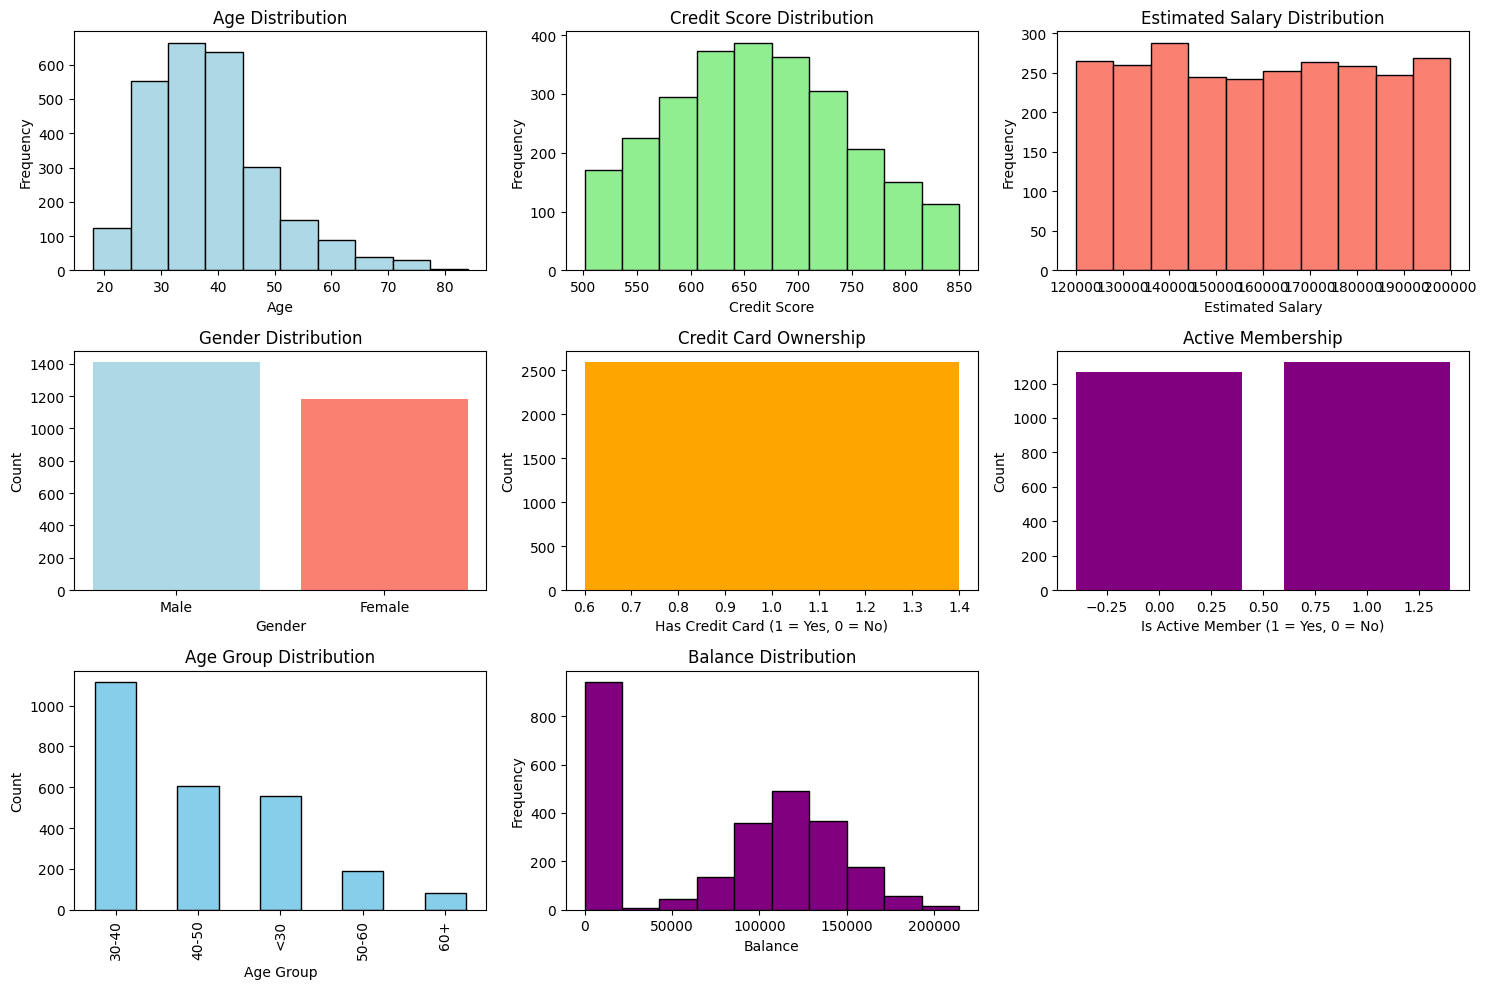

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data
file_path = Path("../data/Bank_Churn_Data.csv")
df = pd.read_csv(file_path)

# Filtering the dataset for potential customers
potential_customers = df[(df['CreditScore'] > 500) & 
                          (df['EstimatedSalary'] > 120000) & 
                          (df['HasCrCard'] == 1)]

# Set up the plots
plt.figure(figsize=(15, 10))

# Plotting Age Distribution
plt.subplot(3, 3, 1)
plt.hist(potential_customers['Age'], bins=10, color='lightblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting Credit Score Distribution
plt.subplot(3, 3, 2)
plt.hist(potential_customers['CreditScore'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

# Plotting Estimated Salary Distribution
plt.subplot(3, 3, 3)
plt.hist(potential_customers['EstimatedSalary'], bins=10, color='salmon', edgecolor='black')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

# Plotting Gender Distribution
plt.subplot(3, 3, 4)
gender_counts = potential_customers['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plotting HasCrCard Distribution
plt.subplot(3, 3, 5)
has_cr_card_counts = potential_customers['HasCrCard'].value_counts()
plt.bar(has_cr_card_counts.index, has_cr_card_counts.values, color='orange')
plt.title('Credit Card Ownership')
plt.xlabel('Has Credit Card (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Plotting IsActiveMember Distribution
plt.subplot(3, 3, 6)
is_active_member_counts = potential_customers['IsActiveMember'].value_counts()
plt.bar(is_active_member_counts.index, is_active_member_counts.values, color='purple')
plt.title('Active Membership')
plt.xlabel('Is Active Member (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Plotting Age Group Distribution
potential_customers['AgeGroup'] = pd.cut(potential_customers['Age'], bins=[0, 30, 40, 50, 60, 70], labels=['<30', '30-40', '40-50', '50-60', '60+'])
age_group_counts = potential_customers['AgeGroup'].value_counts()
plt.subplot(3, 3, 7)
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Plotting Balance Distribution
plt.subplot(3, 3, 8)
plt.hist(potential_customers['Balance'], bins=10, color='purple', edgecolor='black')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


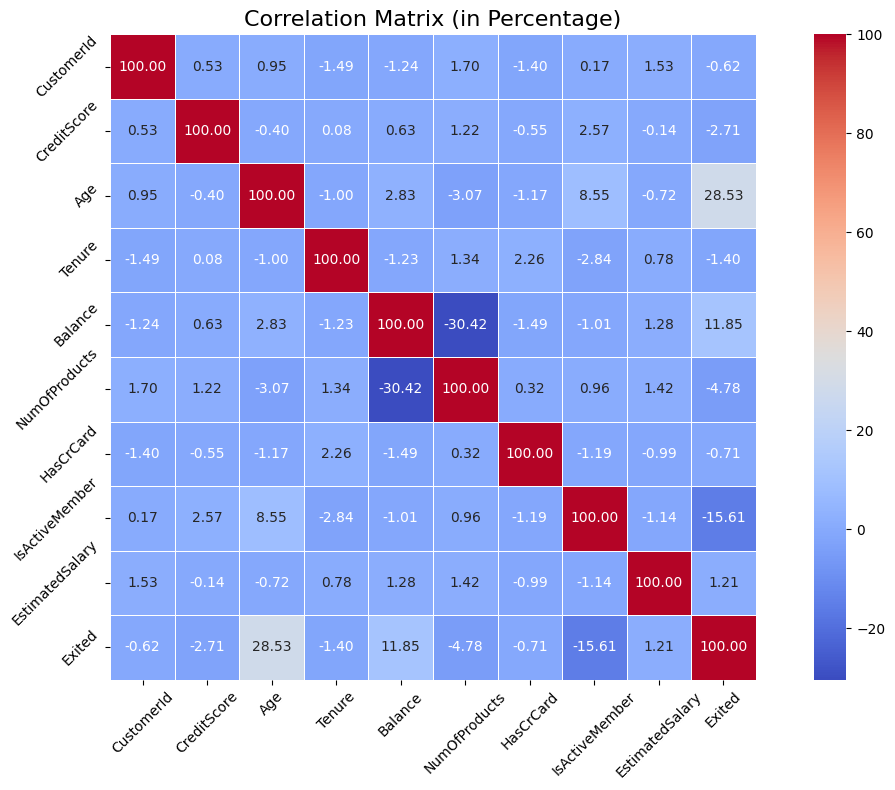

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data
file_path = Path("../data/Bank_Churn_Data.csv")
df = pd.read_csv(file_path)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr() * 100  # Convert to percentage

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix (in Percentage)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data
file_path = Path("../data/Bank_Churn_Data.csv")
df = pd.read_csv(file_path)

# Q5: Identify 'At-Risk' customers based on the criteria
at_risk_customers = df[
    (df['CreditScore'] < 600) &
    (df['Age'] > 50) &
    (df['Balance'] > 100000) &
    (df['IsActiveMember'] == 0) &
    (df['NumOfProducts'] <= 1) &
    (df['Exited'] == 0)
]

# a) Customer in which specific region is more likely to be "At-Risk"
region_counts = at_risk_customers['Geography'].value_counts()

plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('At-Risk Customers by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of At-Risk Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# b) Customer of which specific age group is more likely to be "At-Risk"
# Creating age groups for better segmentation
at_risk_customers['AgeGroup'] = pd.cut(at_risk_customers['Age'], bins=[50, 60, 70, 80], labels=['50-60', '60-70', '70+'])

age_group_counts = at_risk_customers['AgeGroup'].value_counts()

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('At-Risk Customers by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of At-Risk Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# c) Count of At-Risk Customers without a Credit Card
no_credit_card_count = at_risk_customers[at_risk_customers['HasCrCard'] == 0].shape[0]

print(f"Number of At-Risk Customers without a Credit Card: {no_credit_card_count}")
